## **Balanza Comercial y Tendencias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

---

**Cargar conjunto de datos**

In [3]:
df_2012_2023 = pd.read_csv('../data/processed/mex_trade_2012_2023_clean.csv')
df_2012_2023.head()

,prod_est,coverage,type,year,month,concept,value_usd,status
0,Trade Balance of Goods of Mexico,National,Exports,2012,1,Total Exports,"27,281.58",Final Figures
1,Trade Balance of Goods of Mexico,National,Exports,2012,1,Petroleum,"4,628.30",Final Figures
2,Trade Balance of Goods of Mexico,National,Exports,2012,1,Crude Oil,"4,008.11",Final Figures
3,Trade Balance of Goods of Mexico,National,Exports,2012,1,Other Oil,620.18,Final Figures
4,Trade Balance of Goods of Mexico,National,Exports,2012,1,Non Petroleum,"22,653.28",Final Figures


---

**Calcular la Balanza comercial anual**

In [4]:
balanza = pd.pivot_table(df_2012_2023, values='value_usd', index='year', columns='type', aggfunc='sum')
balanza['Balance Comercial Anual'] = balanza['Exports'] - balanza['Imports']
balanza

type,Exports,Imports,Not applicable,Balance Comercial Anual
year,,,,
2012,"1,112,309.67","1,502,457.46","-9,688.95","-390,147.79"
2013,"1,140,045.15","1,544,351.16","-12,145.48","-404,306.01"
2014,"1,190,740.90","1,623,145.84","-17,745.65","-432,404.94"
2015,"1,141,668.26","1,601,116.96","-39,446.30","-459,448.70"
2016,"1,121,860.84","1,569,246.66","-36,716.10","-447,385.82"
2017,"1,228,297.72","1,705,150.95","-33,710.33","-476,853.23"
2018,"1,352,138.18","1,882,275.57","-39,712.33","-530,137.39"
2019,"1,381,811.63","1,844,718.77","-1,151.63","-462,907.14"
2020,"1,251,512.20","1,552,528.28","58,077.33","-301,016.07"


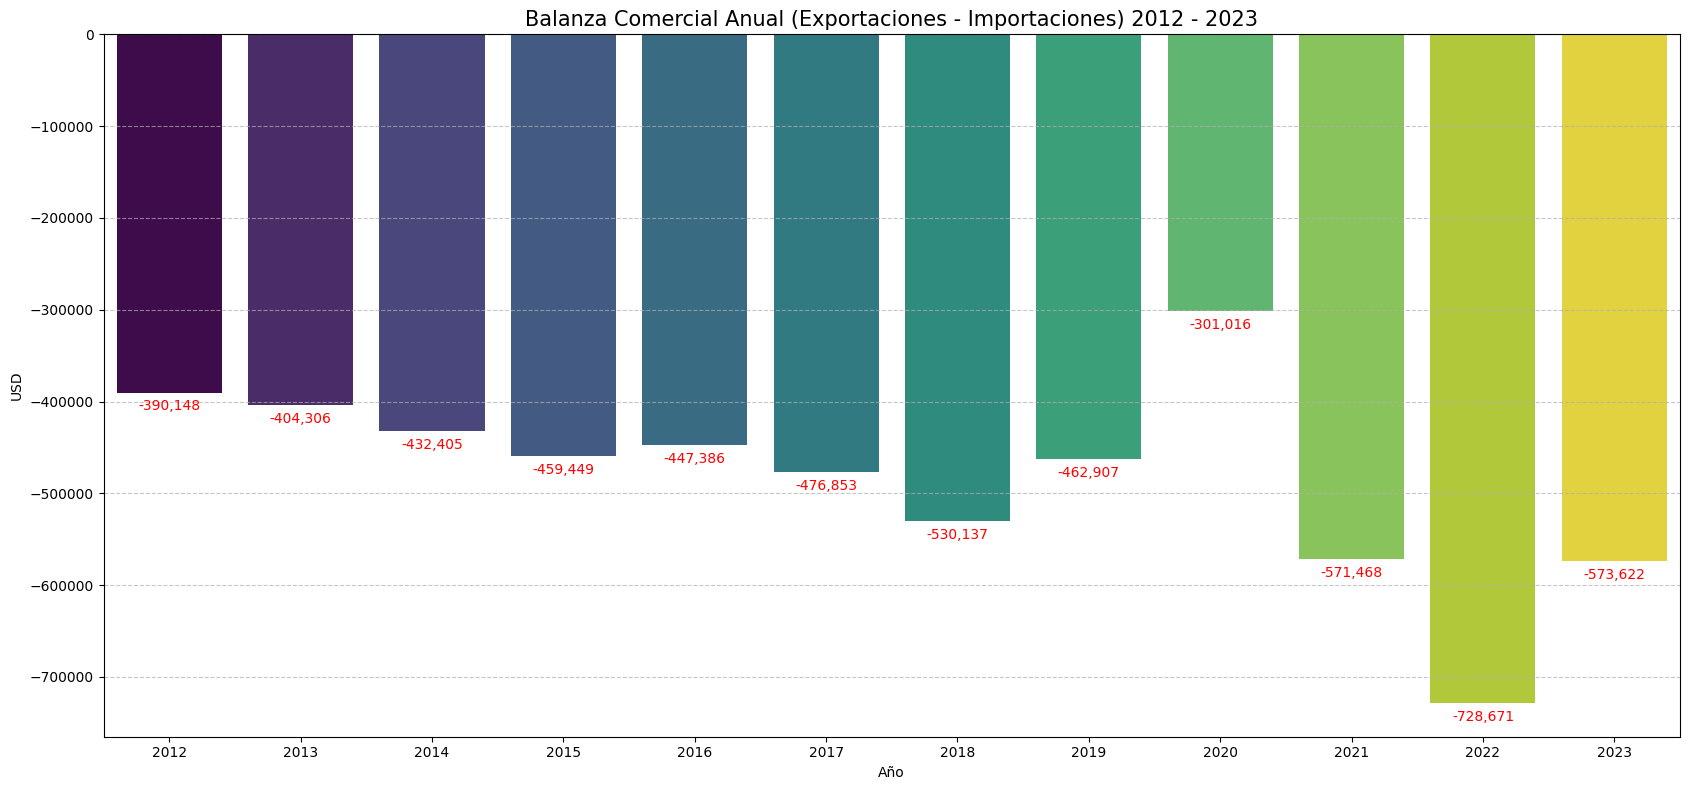

In [5]:
plt.figure(figsize=(17,8))
ax = sns.barplot(x='year', y='Balance Comercial Anual', data=balanza, hue='year', palette='viridis', legend=False)
plt.title('Balanza Comercial Anual (Exportaciones - Importaciones) 2012 - 2023', fontsize = 15)
plt.xlabel('Año')
plt.ylabel('USD')
plt.grid(axis='y', linestyle='--', alpha=0.7) 

for p in ax.patches:
    height = p.get_height()
    if height < 0:
        text_color = 'red'
        va = 'top'
        y_offset = -5 
    else:
        text_color = 'green'
        va = 'bottom'
        y_offset = 5 

    ax.annotate(f'{height:,.0f}', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va=va, fontsize=10, color=text_color,
                xytext=(0, y_offset), textcoords='offset points')


plt.tight_layout()

plt.show()

***Balance Comercial: Un Déficit Crónico y en Aumento***

Nuestro análisis del balance comercial anual entre 2012 y 2023 revela una realidad innegable: la entidad ha mantenido un déficit comercial persistente en cada uno de estos años. Esto significa que el valor de las importaciones ha superado consistentemente al de las exportaciones, una brecha que se visualiza claramente con todas las barras del gráfico extendiéndose por debajo del eje cero.

***La Magnitud y Tendencia del Déficit***

La magnitud de este déficit es considerable, oscilando entre los `-$301,016` y los `-$728,671`. Alarmantemente, hemos observado una tendencia general de incremento en el déficit desde 2012, alcanzando su punto más alto en 2022 con -$728,671.

Un punto de interés es el año 2020, que rompe esta tendencia con el déficit más bajo del período ``( -$301,016)``. Esto coincide con el inicio de la pandemia de COVID-19, sugiriendo que las importaciones pudieron haber caído más drásticamente o las exportaciones mostraron una mayor resiliencia en proporción durante ese año. Sin embargo, en 2023, aunque el déficit se redujo ligeramente respecto a 2022, se mantiene en un nivel elevado de ``-$573,622``.

***Consistencia en los Datos***

Estos hallazgos no son aislados; confirman y refuerzan las observaciones de nuestros análisis previos. Tanto los gráficos de volumen total, que muestran las importaciones consistentemente por encima de las exportaciones, como los de participación porcentual, que indican una mayor proporción de importaciones, respaldan esta interpretación de un déficit comercial crónico.

En síntesis, la entidad enfrenta una dependencia continua y creciente de las importaciones, un factor clave a considerar en su dinámica económica.

---

**Analizar tendencias con la balanza como serie de tiempo.**

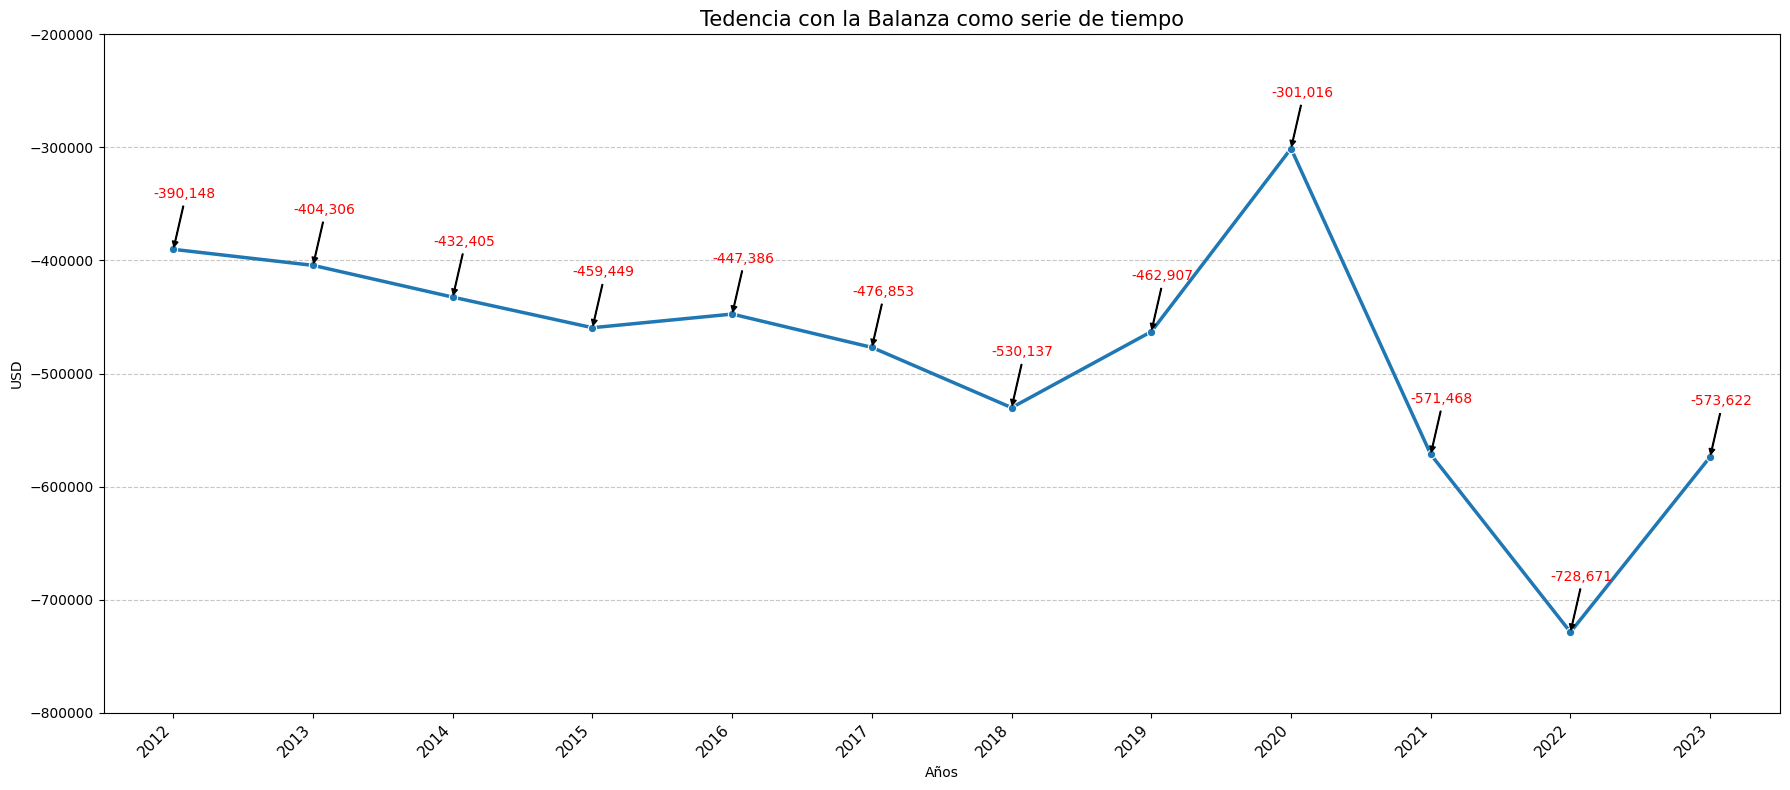

In [ ]:
plt.figure(figsize=(18,8))
ax= sns.lineplot(x='year', y='Balance Comercial Anual', data=balanza, marker='o', linewidth=2.5, color='#1f77b4')

plt.title('Tedencia con la Balanza como serie de tiempo', fontsize=15)
plt.xlabel('Años')
plt.ylabel('USD')
plt.grid(axis='y', linestyle='--', alpha=0.7) 

for i, point in balanza.reset_index().iterrows():
    year = point['year']
    balance = point['Balance Comercial Anual']
    
    formatted_balance = f'{balance:,.0f}'
    
    ax.annotate(formatted_balance,
                (year, balance),
                textcoords="offset points", 
                xytext=(8, 37),           
                ha='center',               
                fontsize=10,               
                color='red' if balance < 0 else 'green',
                arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=4, headlength=4) 
               )
 
plt.xlim(balanza.index.min() - 0.5, balanza.index.max() + 0.5)
plt.ylim(-800000, -200000)

plt.xticks(balanza.index, fontsize=11, rotation=45, ha='right') 

plt.tight_layout()
plt.show()

La balanza comercial de la entidad ha estado en un déficit crónico a lo largo de todo el período 2012-2023. La tendencia principal ha sido un aumento constante de este déficit, con una notable interrupción y reducción temporal en 2020 debido a la pandemia, seguida de un rápido y significativo crecimiento del déficit en 2021 y 2022, alcanzando un máximo histórico en 2022. El año 2023 muestra una ligera moderación, pero el déficit se mantiene en niveles elevados. Esta tendencia subraya una dependencia estructural de las importaciones y un desafío continuo para equilibrar el flujo comercial.

---